<a href="https://colab.research.google.com/github/pranonrahman/DIP-2021-Tasks/blob/main/DIP_Lab_04___170041014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
In this lab we are suppossed to do Color Image Processing

Tasks of this lab are:
## Task 1 : Negative Transformation Function
For grayscale images, we only have one channel that we need to convert. But in the case of RGB images, split the images into three different channels. 
$$T'(.) = 255-T(.)$$

####For HSI color: 
Convert the RGB image to HSI counterpart. Then we need to split into three different channels. Then apply negative transformation, to HUE, Saturation and Intensity differently. 

## Task 2 : Global Histogram Equalization on color images
We need to apply GHE on both **RGB \& HSI** color channels. For HSI we only implement HE to I channel. 

Now provide a side by side comparison between both transformation. 

## Task 3 : Filtering on Color Images

### Subtask 1: Sharpening Operation

For HSI channel only apply sharepning operation in intensity channel

### Subtask 2: Box filter


## Task 4: Noise Removal
Apply non-linear filter (median, max or min) 

- Add noise on each of three different channels. 
- Apply noise removal to each of these three channels. (Even for HSI) 




## Loading the libraries

In [ ]:
!pip3 -q install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=38c14335f35f61d773c1267388c0011a9f49ee5b00600165f28dd03c2bac9948
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
#for iterating through the files and clearing output from the notebook  
import os
from IPython.display import clear_output


#Required Library for HSI
import cv2

#Requred library for editing the files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget -r 'http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH06_Original_Images.zip'

--2021-08-27 13:50:21--  http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH06_Original_Images.zip
Resolving www.imageprocessingplace.com (www.imageprocessingplace.com)... 74.208.236.87
Connecting to www.imageprocessingplace.com (www.imageprocessingplace.com)|74.208.236.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23506494 (22M) [application/zip]
Saving to: ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH06_Original_Images.zip’

www.imageprocessing 100%[===================>]  22.42M  6.16MB/s    in 4.2s    

2021-08-27 13:50:25 (5.37 MB/s) - ‘www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH06_Original_Images.zip’ saved [23506494/23506494]

FINISHED --2021-08-27 13:50:25--
Total wall clock time: 4.4s
Downloaded: 1 files, 22M in 4.2s (5.37 MB/s)


In [ ]:
!unzip -q '/content/www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH06_Original_Images.zip' -d '/content/data'

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\


## Task 1: Apply Negative Transformation
In this task we need to apply negative transformation to color image. First we will need to apply it on RGB color palette. And on another example we need to apply transformation on HSI image. 

In [ ]:
def apply_negative_1d(channel: np.array):
    """
    The function applies negative transformation to a single channel. 

    Parameter Description:
    channel: it accepts a numpy array which represents a single channel of the image. 
    """
    return 255.0 - channel

In [ ]:
def apply_negative_rgb(image):
    image_np = np.array(image)
    print(image_np.shape)
    r = image_np[:,:,0]
    g = image_np[:,:,1]
    b = image_np[:,:,2]
    
    transformed_r = apply_negative_1d(r)
    transformed_g = apply_negative_1d(g)
    transformed_b = apply_negative_1d(b)
    
    negative_image = np.dstack((transformed_r, transformed_g, transformed_b))
    print(negative_image.shape)
    negative_image = Image.fromarray(negative_image.astype('uint8'))
    return negative_image

In [ ]:
def apply_negative_hsv(image):
    """
    Steps:
    1. Convert RGB to HSI scheme
    2. Apply transformations differently
    3. Show the images
    """
    image_np = np.array(image.convert(mode="HSV"))
    h = image_np[:,:,0]
    s = image_np[:,:,1]
    v = image_np[:,:,2]
    
    # h-transformation
    h = h + 128
    h[h > 255] -= 255

    s = s
    
    v = 255.0-v

    negative_image_hsi = np.dstack((h,s,v))
    negative_image = Image.fromarray(negative_image_hsi.astype('uint8'), 'HSV')
    negative_image = negative_image.convert(mode="RGB")
    return negative_image


(666, 666, 3)
(666, 666, 3)


Text(0.5, 1.0, 'Negative Transformation HSI')

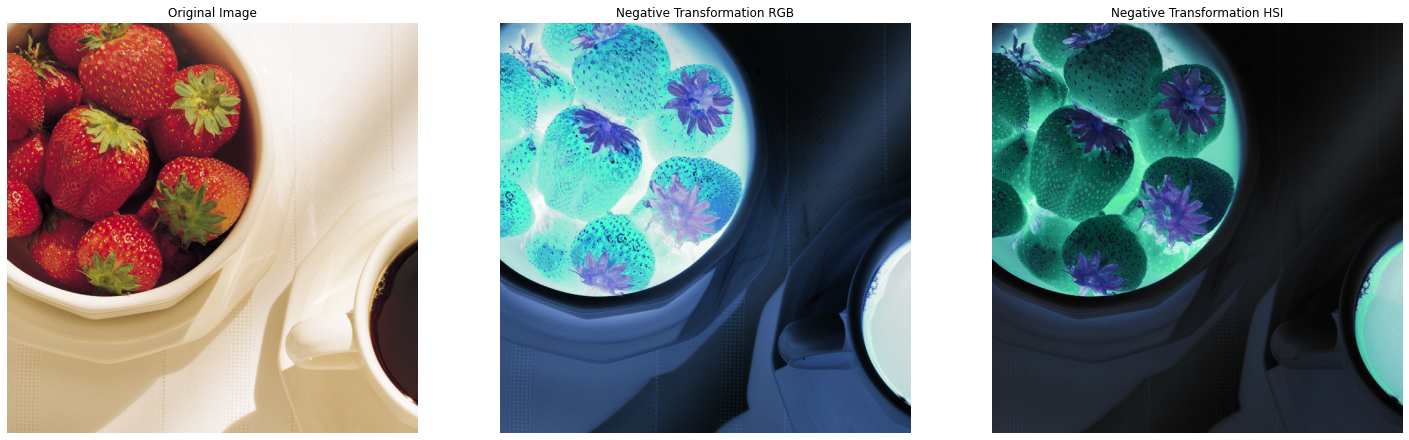

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH06/Fig0631(a)(strawberries_coffee_full_color).tif')
fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,3,index)
plt.imshow(image)
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(apply_negative_rgb(image))
plt.axis('off')
plt.title(f'Negative Transformation RGB')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(apply_negative_hsv(image))
plt.axis('off')
plt.title(f'Negative Transformation HSI')


## Discussion
In this section we showed negative transformation of color image. The first one is the original image. The second and the third one is the negative transformation of RGB and HSV channels. Although theoritically the transformation should look similar, the HSV one looks a little bit darker in python

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\

## Task 2 
Global Histogram Equalization

In [ ]:
def get_frequency_count(channel):
    intensity_matrix = np.array(channel)
    color, frequency = np.unique(intensity_matrix,return_counts=True)
    histogram = np.full(256,0,'uint64')
    histogram[color]=frequency
    return histogram

def histogram_equalization(channel):
  histogram = get_frequency_count(channel)
  cumHistogram = np.cumsum(histogram)
  totalPixelCount = np.sum(histogram)
  CDF = cumHistogram/totalPixelCount
  scaled = np.round(255*CDF).astype('uint8')
  channel=scaled[channel]
  return channel

In [ ]:
def histogram_equalization_rgb(image):
    image = image.convert(mode='RGB')
    image_np = np.array(image)
    r = image_np[:,:,0]
    g = image_np[:,:,1]
    b = image_np[:,:,2]
    
    r = histogram_equalization(r)
    g = histogram_equalization(g)
    b = histogram_equalization(b)

    he = np.dstack((r, g, b))
    he = Image.fromarray(he.astype('uint8'))
    return he

In [ ]:
def histogram_equalization_hsv(image):
    image_np = np.array(image.convert(mode="HSV"))
    h = image_np[:,:,0]
    s = image_np[:,:,1]
    v = image_np[:,:,2]
    
    # h-transformation
    h = h
    
    s = s
    
    v = histogram_equalization(v)

    he = np.dstack((h,s,v))
    he = Image.fromarray(he.astype('uint8'), 'HSV')
    he = he.convert(mode="RGB")
    return he

Text(0.5, 1.0, 'Histogram Equalization HSI')

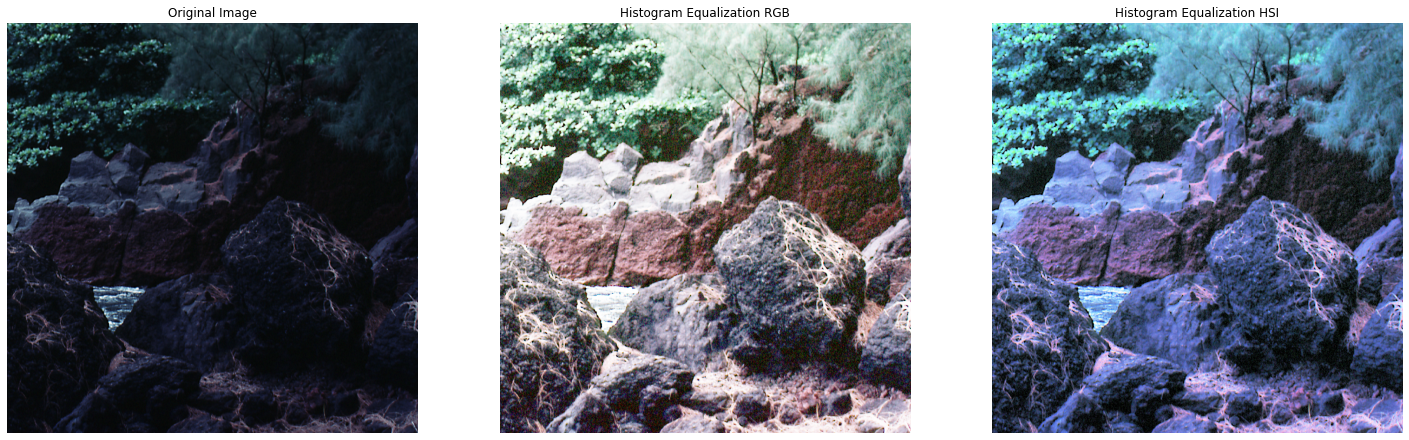

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH06/Fig0635(bottom_left_stream).tif')
fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,3,index)
plt.imshow(image)
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(histogram_equalization_rgb(image))
plt.axis('off')
plt.title(f'Histogram Equalization RGB')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(histogram_equalization_hsv(image))
plt.axis('off')
plt.title(f'Histogram Equalization HSI')

## Discussion
In this section we applied global histogram equalization on color image. On RGB we applied GHE on 3 different channels separately. But in the case of HSV image, we only applied GHE on V channel. Both applied images have better  representation on the darker spots.

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\

## Task 3: Apply sharpening filter on color image


In [ ]:
def zero_pad_image(image, image_height, image_width, pad):
    """
    This function adds zero padding to an image. Here we are assuming the image has a uniform padding size. 
    """
    # print(image_height)
    # print(image_width)
    pad = pad//2
    padded_height = image_height+2*pad
    padded_width = image_width+2*pad
    # print(padded_height, padded_width)
    padded_image = np.zeros((padded_height, padded_width ))

    padded_image[pad:image_height+pad  , pad:image_width+pad] = image
    # for row in padded_image:
    #     for column in row:
    #         for channel in column:
    #             if(channel > 255 or channel <0):
    #                 print("ekhane: ",channel)
    # print("eta")
    # print(image.shape)
    # print(padded_image.shape)
    return padded_image



def conv2d(image, filter, padding = 'same', stride = 1, scaling = False):
    """
    This function implements the convolution operation. It takes 3 parameters:
    image: the source image on which we will run convolution
    filter: the filter what will be convoluted. 
    padding: the amount of size by which we need to pad. if the padding is same, then we need to calculate the size of padding
             otherwise we will zero pad the image by the amount specified
    stride: the amount of shifts after an operation

    returns: the modified image
    """
    # filter = np.flipud(np.fliplr(filter))
    # print(image.shape)

    filter_height = filter.shape[0]
    filter_width = filter.shape[1]

    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        pad = ((stride-1)*image_width-stride+filter_width)/2
    else:
        pad = padding

    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    output_image = np.zeros(padded_image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - filter_width:
            # it means the convolution has ended
            break
        
        if y % stride == 0:
            for x in range(image_height):
                if x > image_height - filter_height:
                    break

                try:
                    if x%stride==0:
                        output_image[x,y] = (filter * padded_image[x:x+filter_height, y:y+filter_width]).sum()
                except:
                    break
    if scaling==True:
        minimum_value = np.min(output_image)
        print(minimum_value)
        output_image = output_image + (-1*minimum_value)
        maximum_value = np.max(output_image)
        output_image = (output_image/maximum_value)*255.0
    return output_image

In [ ]:
def final_laplacian_filter(image,const = 1):
    mask = [
            [ 0 , -1 , 0],
            [ -1 , 5 , -1],
            [ 0 , -1 , 0],
    ]
    mask = np.array(mask)
    sharpened_image = conv2d(image, mask)
    if True:
        """
        Here we clipped the values of the pixel values that are less than 0 or greater than 255
        """
        sharpened_image[sharpened_image > 255] = 255.0
        sharpened_image[sharpened_image < 0] = 0
        

    # print(np.min(sharpened_image),np.max(sharpened_image))
    return  sharpened_image

In [ ]:
def sharpen_image_rgb(image):
    image = image.convert(mode='RGB')
    image_np = np.array(image)
    r = image_np[:,:,0]
    g = image_np[:,:,1]
    b = image_np[:,:,2]
    
    r = final_laplacian_filter(r,3)
    g = final_laplacian_filter(g,3)
    b = final_laplacian_filter(b,3)

    sharpened = np.dstack((r, g, b))
    sharpened = Image.fromarray(sharpened.astype('uint8'))
    return sharpened

In [ ]:
def sharpen_image_hsv(image):
    image_np = np.array(image.convert(mode="HSV"))
    h = image_np[:,:,0]
    s = image_np[:,:,1]
    v = image_np[:,:,2]
    
    # h-transformation
    h = h
    
    s = s
    
    v = final_laplacian_filter(v)

    he = np.dstack((h,s,v))
    sharpened = Image.fromarray(he.astype('uint8'), 'HSV')
    sharpened = sharpened.convert(mode="RGB")
    return sharpened

Text(0.5, 1.0, 'Sharpened HSI')

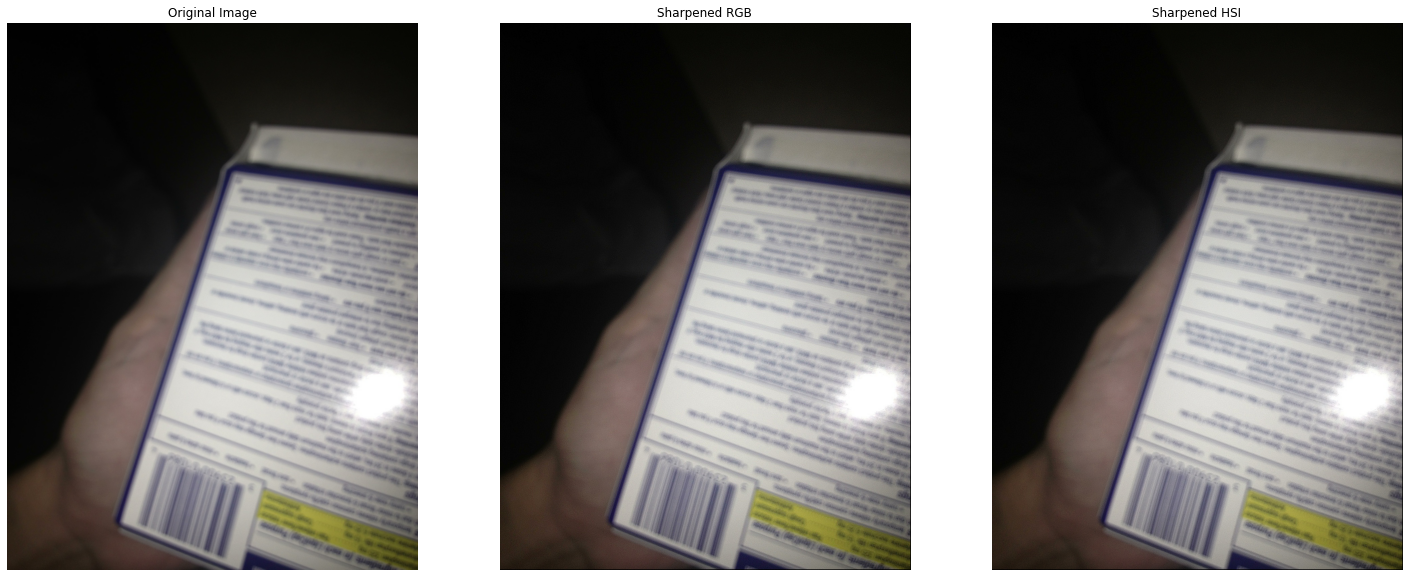

In [ ]:
image = Image.open('/content/240685700_240209131317326_4376964356355060263_n.jpg')
fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,3,index)
plt.imshow(image)
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpen_image_rgb(image))
plt.axis('off')
plt.title(f'Sharpened RGB')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(sharpen_image_hsv(image))
plt.axis('off')
plt.title(f'Sharpened HSI')


## Discussion
Here we applied sharpening operation. Both the images have more sharpness compared to the previous ones. But the images have lost color information. 

. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\
. \\

## Task 4 : Non Linear Filtering

In [ ]:
def salt_and_pepper(channel, prob=0.05):
    # If the specified `prob` is negative or zero, we don't need to do anything.
    if prob <= 0:
        return channel

    arr = np.asarray(channel)
    original_dtype = arr.dtype

    intensity_levels = 2 ** (arr[0, 0].nbytes * 8)

    min_intensity = 0
    max_intensity = intensity_levels - 1


    random_image_arr = np.random.choice(
        [min_intensity, 1, np.nan], p=[prob / 2, 1 - prob, prob / 2], size=arr.shape
    )

    
    salt_and_peppered_arr = arr.astype(np.float) * random_image_arr


    salt_and_peppered_arr = np.nan_to_num(
        salt_and_peppered_arr, nan=max_intensity
    ).astype(original_dtype)

    return salt_and_peppered_arr

In [ ]:
def add_noise_to_image(image):
    image = image.convert(mode='RGB')
    image_np = np.array(image)
    r = image_np[:,:,0]
    g = image_np[:,:,1]
    b = image_np[:,:,2]

    r = salt_and_pepper(r)
    g = salt_and_pepper(g)
    b = salt_and_pepper(b)
    
    image = np.dstack((r, g, b))
    image = Image.fromarray(image.astype('uint8'))
    return image

In [ ]:
def find_median(array,length):
    li = []
    for row in array:
        for item in row:
            li.append(item)

    li.sort()
    return li[length//2]


def non_linear_filter(image, neighbour_region, conv_type='median', padding = 'same', stride = 1):
    """
    This filter implements the non_linear_filtering operation along with the convolution. The parameters of the operation are:
    image: the input image
    neighbour_region: an integer representing the region where that we will be considered for operation
    type: it is a string that defines the type of operaration
    padding: here we set the value of padding. If the padding is same then we calculate the padding size
    stride: the amount of strides
    """

    image_height = image.shape[0]
    image_width =  image.shape[1]

    if padding == 'same':
        pad = ((stride-1)*image_width-stride+neighbour_region)/2
    else:
        pad = padding

    padded_image = zero_pad_image(image, image_height, image_width, int(pad))

    output_image = np.zeros(padded_image.shape)
    # print(padded_image.shape)
    # padded_image = Image.fromarray(padded_image.astype('uint8'))
    
    # display(padded_image)

    for y in range(image_width):
        if y > image_width - neighbour_region:
            # it means the convolution has ended
            break
        
        if y % stride == 0:
            for x in range(image_height):
                if x > image_height - neighbour_region:
                    break

                try:
                    if x%stride==0:
                        # print("ekhane")
                        # print(result)
                        if conv_type == 'median':
                            output_image[x,y] = find_median(padded_image[x:x+neighbour_region, y:y+neighbour_region],neighbour_region*neighbour_region)
                        elif conv_type == 'min':
                            output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).min()
                        elif conv_type == 'max':
                            output_image[x,y] = (padded_image[x:x+neighbour_region, y:y+neighbour_region]).max()
                        else:
                            print("TYPE NOT DEFINED")
                            return 
                except:
                    break
    
    output = Image.fromarray(output_image.astype('uint8'))
    return output

In [ ]:
def denoise_rgb(image):
    image = image.convert(mode='RGB')
    image_np = np.array(image)
    r = image_np[:,:,0]
    g = image_np[:,:,1]
    b = image_np[:,:,2]
    
    r = non_linear_filter(r,3)
    g = non_linear_filter(g,3)
    b = non_linear_filter(b,3)


    sharpened = np.dstack((r, g, b))
    sharpened = Image.fromarray(sharpened.astype('uint8'))
    return sharpened

In [ ]:
def denoise_hsv(image):
    image_np = np.array(image.convert(mode="HSV"))
    h = image_np[:,:,0]
    s = image_np[:,:,1]
    v = image_np[:,:,2]
    
    # h-transformation
    h = non_linear_filter(h,3)
    s = non_linear_filter(s,3)
    v = non_linear_filter(v,3)

    he = np.dstack((h,s,v))
    he = Image.fromarray(he.astype('uint8'), 'HSV')
    he = he.convert(mode="RGB")
    return he

Text(0.5, 1.0, 'Denoised HSI')

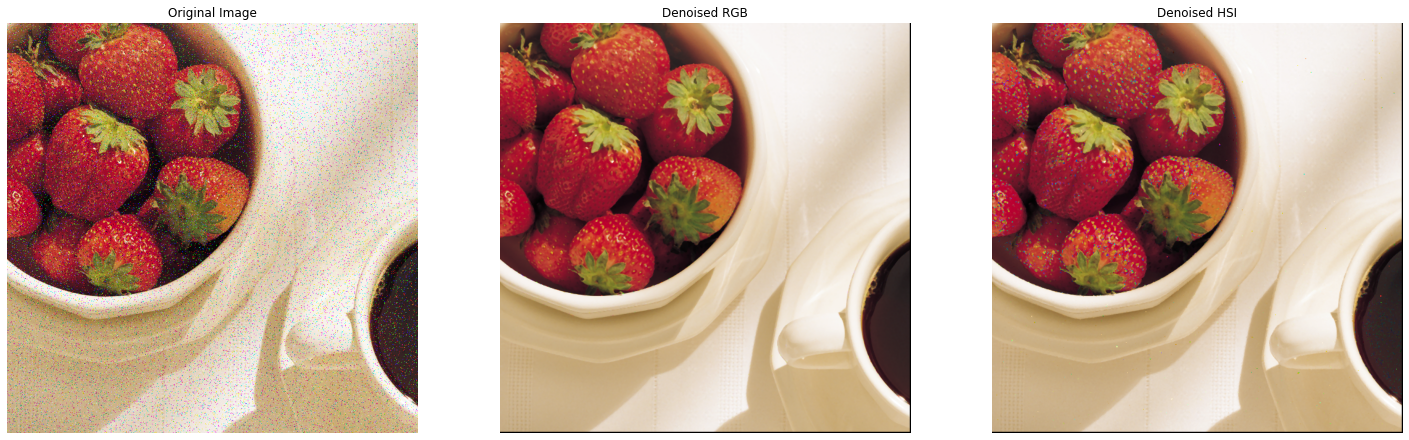

In [ ]:
image = Image.open('/content/data/DIP3E_Original_Images_CH06/Fig0631(a)(strawberries_coffee_full_color).tif')
image = add_noise_to_image(image)

# display(image)
fig = plt.figure(figsize = (25,25))
index = 1

fig.add_subplot(1,3,index)
plt.imshow(image)
plt.axis('off')
plt.title(f'Original Image')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(denoise_rgb(image))
plt.axis('off')
plt.title(f'Denoised RGB')

index += 1
fig.add_subplot(1,3,index)
plt.imshow(denoise_hsv(image))
plt.axis('off')
plt.title(f'Denoised HSI')

## Discussion
Here we used non linear filter for denoising the image. In the case of RGB and HSV we used the similar kind of appraoch. We can see both the images have less number of noises in the,. Although HSV image shows a bnetter infromation in the straberry portion.